<a href="https://colab.research.google.com/github/CandidoJr209/Style_transfer/blob/main/Style_transfer_pre_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Upload the main image and the ones with the styles


In [5]:
from google.colab import files
uploaded = files.upload()

Saving style_6.jpg to style_6.jpg


## Load the pre-trained model

In [6]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Create the function that loads the image

In [9]:
def image_load(path):
  img = tf.io.read_file(path)  # Read file from path
  img = tf.image.decode_image(img, channels=3)    # Use the 3 channels
  img = tf.image.convert_image_dtype(img, tf.float32)    # Conert to float32
  img = img[tf.newaxis, :]  # Extract the image from array
  return img  #  Return the image

## Load the images into variables

In [10]:
# In this example there is one main image and 10 different styles
content = image_load('content.jpg') 
style_1 = image_load('style_1.jpg')
style_2 = image_load('style_2.jpg')
style_3 = image_load('style_3.jpg')
style_4 = image_load('style_4.jpg')
style_5 = image_load('style_5.jpg')
style_6 = image_load('style_6.jpg')
style_7 = image_load('style_7.jpg')
style_8 = image_load('style_8.jpg')
style_9 = image_load('style_9.jpg')
style_10 = image_load('style_10.jpg')

Text(0.5, 1.0, 'Style image')

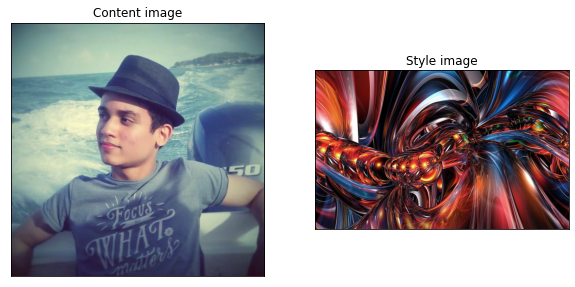

In [11]:
plt.figure(figsize=(10,6))

ax = plt.subplot(1,2,1)
plt.imshow(np.squeeze(content))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Content image')

ax = plt.subplot(1,2,2)
plt.imshow(np.squeeze(style_1))  # To change the style just choose another variable
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Style image')


In [13]:
styled_content = model(tf.constant(content), tf.constant(style_1))[0]  # Let the model run with the chosen images

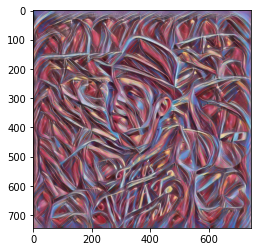

In [14]:
plt.imshow(np.squeeze(styled_content))  # Show the results